## Implement MNIST using Auto-Encoders.

### Importing necessary libraries.

In [1]:
#impoting necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load the MNIST dataset and normalize the data

In [2]:
#load the MNIST dataset and normalize the data
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), np.prod(x_train.shape[1:])))
x_test = np.reshape(x_test, (len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 1s 0us/step


### Define the autoencoder model.

In [3]:
#Define the autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img,decoded)

### Compile and train the model.

In [4]:
#now compile the model using the Adam optimizer and mean squared error loss
autoencoder.compile(optimizer='adam', loss='mse')

In [5]:
#Next,train the model on the MNIST training set
history = autoencoder.fit(x_train, x_train,
                          epochs=3,
                          batch_size=32,
                          shuffle=True,
                          validation_data=(x_test,x_test))

Epoch 1/3
1875/1875 [==============================] - 32s 15ms/step - loss: 0.0311 - val_loss: 0.0185
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0163 - val_loss: 0.0143
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0136 - val_loss: 0.0123


### Model Evaluation

dict_keys(['loss', 'val_loss'])


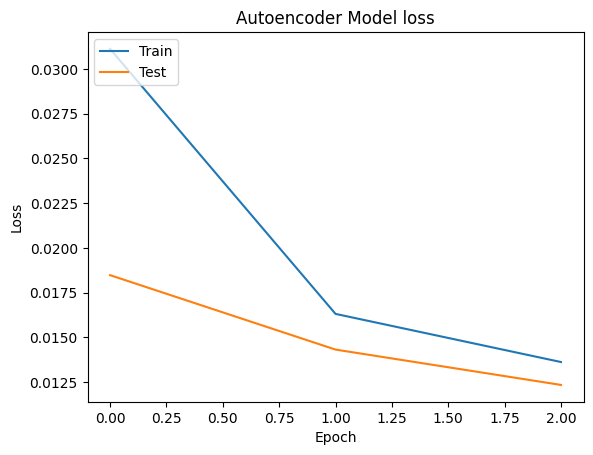

In [6]:
#Model evaluation
def plotmodelhistory(history): 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Autoencoder Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

### Generate reconstructed images using the trained autoencoder

313/313 [==============================] - 1s 3ms/step


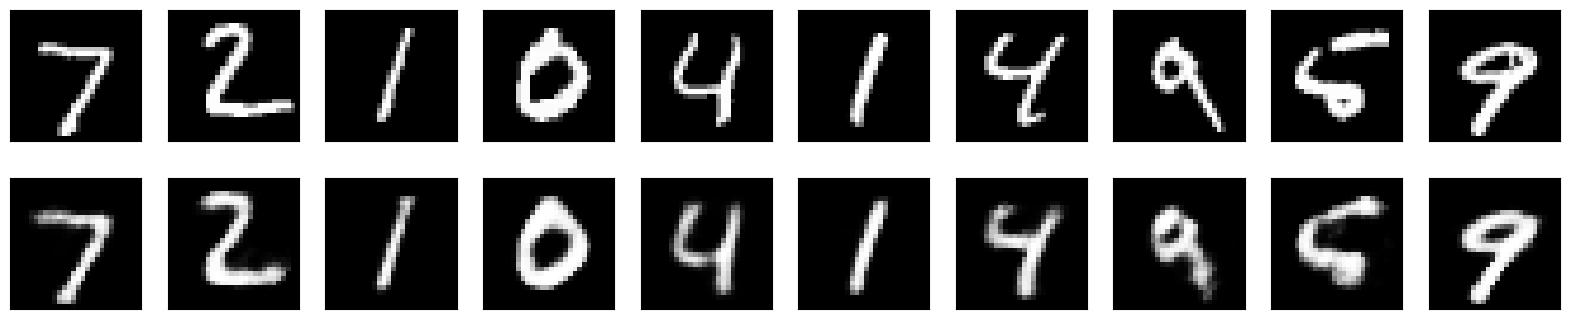

In [7]:
#finally we'll use the trained autoencoder to generate reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()